In [9]:
%matplotlib inline
import matplotlib 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
from dateutil import parser
import datetime

sns.set(style='white', palette='Set2')

def dateparse (timestamp):    
    return parser.parse(timestamp)


df = pd.read_pickle('full_mlarray.pkl')

df.index = df.index.tz_convert('US/Eastern')


print df.columns.values


['alphaS3_aux' 'pressureWind' 'alphaS1_aux' 'alphaS2_aux' 'sharpDust'
 'alphaS3_work' 'alphaS2_work' 'alphaS1_work' 'alphaTemp'
 'min_since_plugged_in' 'Battery ( %)' 'Humidity ( % RAW)' 'Noise ( mV)'
 'Temperature ( C RAW)' 'Light ( lx)' 'Nitrogen Dioxide ( kOhm)'
 'Carbon Monxide ( kOhm)' 'Solar Panel ( V)' 'wd' 'ws'
 u'forecastio_apparentTemperature' u'forecastio_cloudCover'
 u'forecastio_dewPoint' u'forecastio_humidity'
 u'forecastio_precipIntensity' u'forecastio_precipProbability'
 u'forecastio_pressure' u'forecastio_temperature' u'forecastio_visibility'
 u'forecastio_windBearing' u'forecastio_windSpeed' 'forecastio_clear-night'
 'forecastio_clear-day' 'forecastio_partly-cloudy-day'
 'forecastio_partly-cloudy-night' 'forecastio_cloudy' 'forecastio_rain'
 'forecastio_fog' 'forecastio_wind' 'as_temperature'
 'avg_15_as_temperature' 'sck_temperature' 'sck_humidity'
 'forecastio_temperature_c' 'avg_60_forecastio_temperature_c'
 'derivative_sck_temperature' 'derivative_avg_15_as_temper

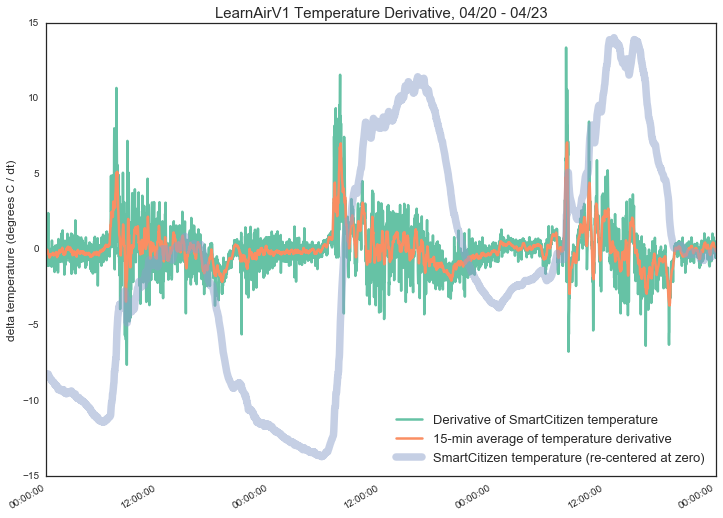

In [2]:
import pytz
localtz = pytz.timezone('US/Eastern')

#starttime = localtz.localize(datetime.datetime(2016,4,20))
#endtime = localtz.localize(datetime.datetime(2016,4,23))

starttime = datetime.datetime(2016,4,20)
endtime = datetime.datetime(2016,4,23)

value1 = 'sck_temperature'
value2 = 'derivative_sck_temperature'
value3 = 'avg_15_derivative_sck_temperature'

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value2].values*25, tz=localtz, ls='solid', marker=None, lw=2.5)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value3].values*25, lw=2.5)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value1].values-20, lw=7.5, alpha=0.5)

plt.legend(['Derivative of SmartCitizen temperature', '15-min average of temperature derivative', 'SmartCitizen temperature (re-centered at zero)'], fontsize=13, loc=4)
plt.ylabel('delta temperature (degrees C / dt)', fontsize=12)
plt.title('LearnAirV1 Temperature Derivative, 04/20 - 04/23', fontsize=15)

plt.savefig('./figs/temp_derivative.png', bbox_inches='tight', dpi=200)

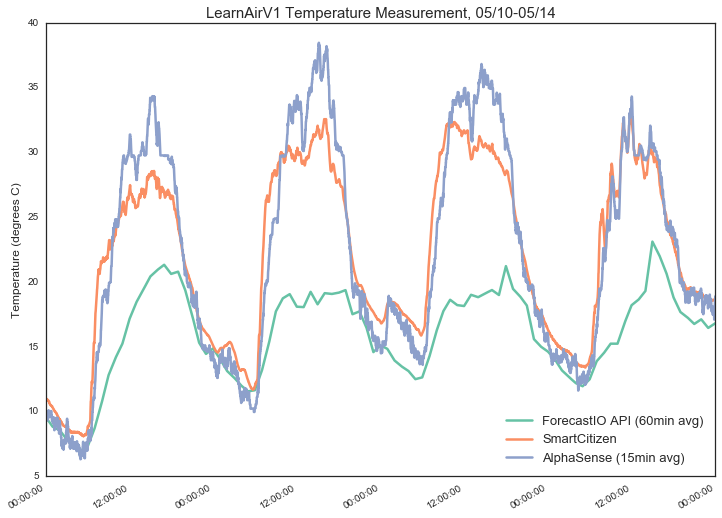

In [3]:
starttime = datetime.datetime(2016,5,10)
endtime = datetime.datetime(2016,5,14)

value3 = 'avg_15_as_temperature'
value2 = 'sck_temperature'
value1 = 'avg_60_forecastio_temperature_c'

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value1].values, tz=localtz, ls='solid', marker=None, lw=2.5)
if value2 is not None:
    plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value2].values, lw=2.5)
if value3 is not None:
    plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value3].values, lw=2.5)
    
plt.legend(['ForecastIO API (60min avg)','SmartCitizen', 'AlphaSense (15min avg)'], fontsize=13, loc=4 )
plt.ylabel('Temperature (degrees C)', fontsize=12)
plt.title('LearnAirV1 Temperature Measurement, 05/10-05/14', fontsize=15)

plt.savefig('./figs/temp_zoomed.png', bbox_inches='tight', dpi=200)

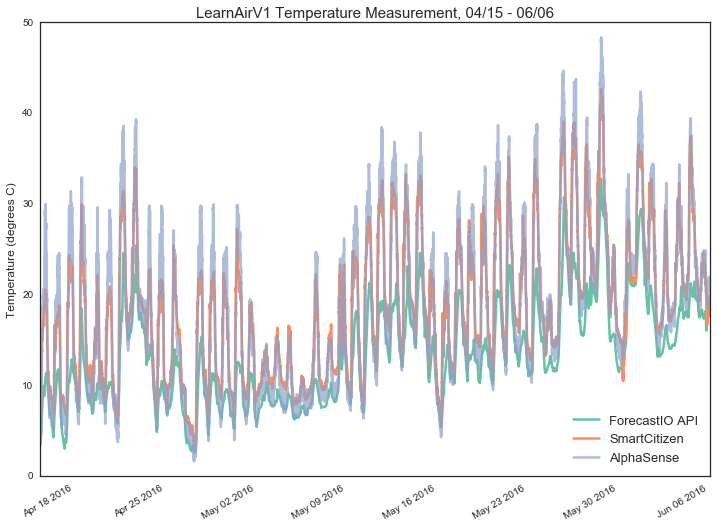

In [6]:
endtime = datetime.datetime(2016,6,6)

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')
    
plt.plot(df.ix[:endtime].index.values, df.ix[:endtime][value1].values, lw=2.5)
if value2 is not None:
    plt.plot(df.ix[:endtime].index.values, df.ix[:endtime][value2].values, lw=2.5)
if value3 is not None:
    plt.plot(df.ix[:endtime].index.values, df.ix[:endtime][value3].values, lw=2.5, alpha=.7)
    
plt.legend(['ForecastIO API','SmartCitizen', 'AlphaSense'], fontsize=13, loc=4 )
plt.ylabel('Temperature (degrees C)', fontsize=12)
plt.title('LearnAirV1 Temperature Measurement, 04/15 - 06/06', fontsize=15)


plt.savefig('./figs/temp.png', bbox_inches='tight', dpi=200)

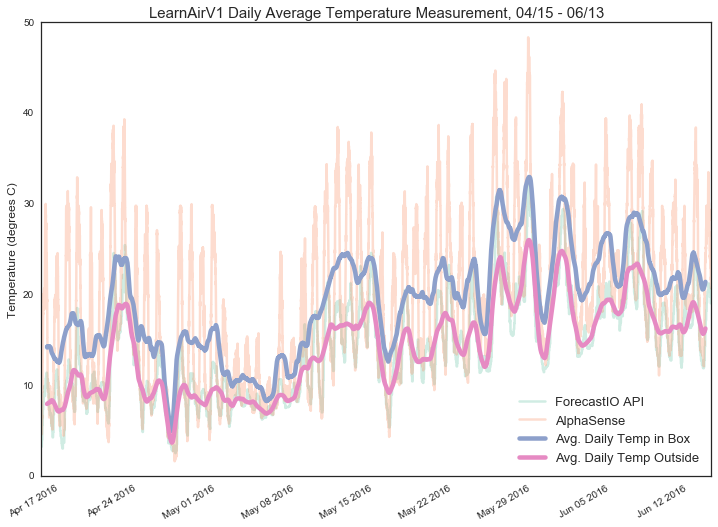

In [10]:
fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

value4 = 'daily_avg_forecastio_temperature'
value3 = 'daily_avg_as_temperature'
value2 = 'avg_15_as_temperature'
value1 = 'forecastio_temperature_c'

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')
    
plt.plot(df.index.values, df[value1].values, lw=2.5, alpha=0.3)
if value2 is not None:
    plt.plot(df.index.values, df[value2].values, lw=2.5, alpha=0.3)
if value4 is not None:
    plt.plot(df.index.values, df[value3].values, lw=4.5)
if value3 is not None:
    plt.plot(df.index.values, df[value4].values, lw=4.5)
    
plt.legend(['ForecastIO API','AlphaSense', 'Avg. Daily Temp in Box', 'Avg. Daily Temp Outside'], fontsize=13, loc=4 )
plt.ylabel('Temperature (degrees C)', fontsize=12)
plt.title('LearnAirV1 Daily Average Temperature Measurement, 04/15 - 06/13', fontsize=15)


plt.savefig('./figs/temp_daily.png', bbox_inches='tight', dpi=200)

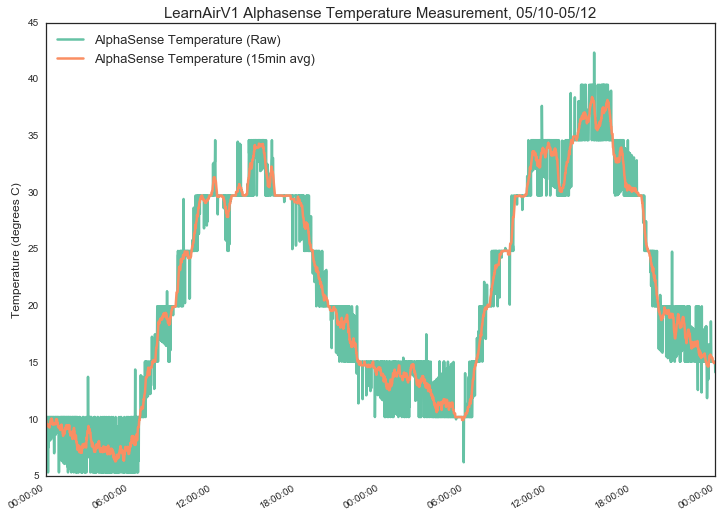

In [11]:
starttime = datetime.datetime(2016,5,10)
endtime = datetime.datetime(2016,5,12)

value1 = 'as_temperature'
value2 = 'avg_15_as_temperature'

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value1].values, tz=localtz, ls='solid', marker=None, lw=2.5)
if value2 is not None:
    plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value2].values, lw=2.5)
   
plt.legend(['AlphaSense Temperature (Raw)', 'AlphaSense Temperature (15min avg)'], fontsize=13, loc=2 )
plt.ylabel('Temperature (degrees C)', fontsize=12)
plt.title('LearnAirV1 Alphasense Temperature Measurement, 05/10-05/12', fontsize=15)

plt.savefig('./figs/temp_alphasense.png', bbox_inches='tight', dpi=200)

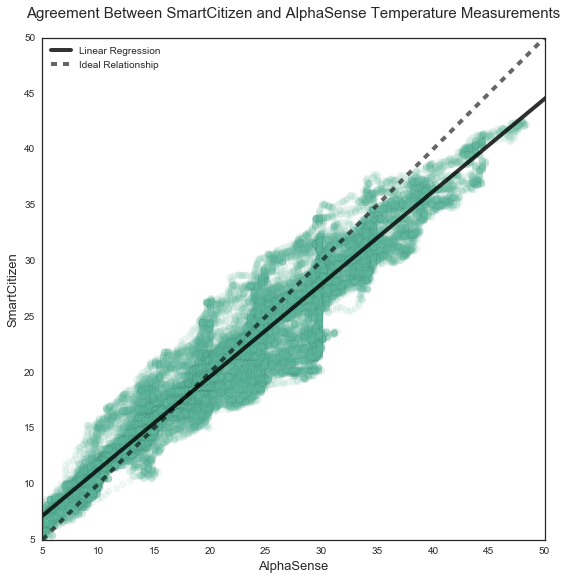

In [42]:
y_col= 'sck_temperature'
x_col= 'avg_15_as_temperature'

fig, ax = plt.subplots(figsize=(9,9))
sns.regplot(x_col, y_col, data=df, fit_reg=True, scatter_kws={'linewidths':.1,'edgecolor':'k',"alpha":0.1,"s":50}, line_kws={"alpha":.8, "lw":4, 'c':'k'})
plt.plot([5,50],[5,50], ls='dashed', lw=4, color='k', alpha=.6)
plt.ylim(5,50)
plt.xlim(5,50)

plt.legend(['Linear Regression','Ideal Relationship'], loc=2)
plt.ylabel('SmartCitizen', fontsize=13)
plt.xlabel('AlphaSense', fontsize=13)
plt.title('Agreement Between SmartCitizen and AlphaSense Temperature Measurements', y=1.03, fontsize=15)

plt.savefig('./figs/temp_alphasense_v_sck.png', bbox_inches='tight', dpi=200)

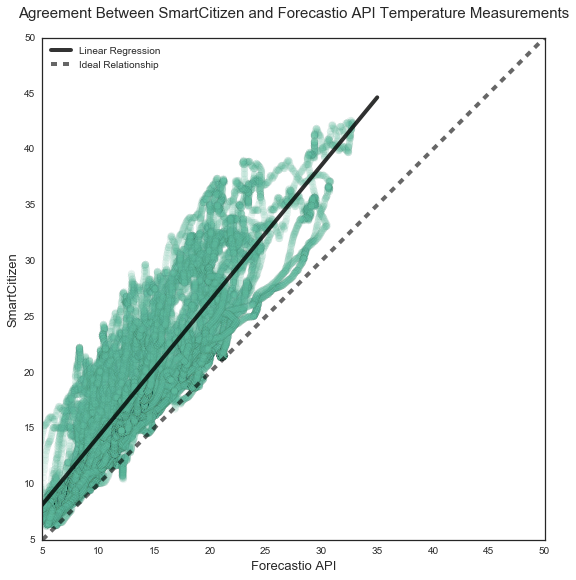

In [41]:
y_col= 'sck_temperature'
x_col= 'avg_60_forecastio_temperature_c'

fig, ax = plt.subplots(figsize=(9,9))
sns.regplot(x_col, y_col, data=df, fit_reg=True, scatter_kws={'linewidths':.1,'edgecolor':'k',"alpha":0.1,"s":50}, line_kws={"alpha":.8, "lw":4, 'c':'k'})
plt.plot([5,50],[5,50], ls='dashed', lw=4, color='k', alpha=.6)
plt.ylim(5,50)
plt.xlim(5,50)

plt.legend(['Linear Regression','Ideal Relationship'], loc=2)
plt.ylabel('SmartCitizen', fontsize=13)
plt.xlabel('Forecastio API', fontsize=13)
plt.title('Agreement Between SmartCitizen and Forecastio API Temperature Measurements', y=1.03, fontsize=15)

plt.savefig('./figs/temp_forecastio_v_sck.png', bbox_inches='tight', dpi=200)